In [138]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

#table = pd.read_html('http://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/edit#gid=1724592523/2017_jun_final.csv', encoding='utf-8')
desired_table = pd.read_csv('2017_jun_final - 2017_jun_final.csv')
desired_table

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,менше 3 місяців,700,700,Одеса,до 50 осіб,...,False,Intermediate (середній),"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Київ,до 50 осіб,...,False,Pre-intermediate (нище середнього),eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львів,до 10 осіб,...,False,Upper-Intermediate (вище середнього),"Веб-розробка,Корпоративні системи",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Дніпро,більше 1000 осіб,...,False,Advanced (просунутий),Фінанси та банкінг,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


In [139]:
rows, columns = desired_table.shape
print("\nКількість рядків:", rows, "Кількість стовпців:", columns)
desired_table.dtypes


Кількість рядків: 8704 Кількість стовпців: 25


N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [140]:
# Порахувати кількість пропущених значень в кожному стовпці
#Спочатку видаляємо стовпець Unnamed:0
desired_table = desired_table.drop(columns=desired_table.columns[0])
print(desired_table)
missing_counts = desired_table.isnull().sum()
print("кількість пропущених значень в кожному стовпці:")

print(missing_counts)
# Розмір таблиці
total_rows = len(desired_table)

# Порахувати частку пропущених значень в кожному стовпці
missing_fraction = missing_counts / total_rows

# Вивести результат
print("Частка пропусків в кожній колонці:")
print(missing_fraction)

                        Посада Мова програмування Спеціалізація  \
0           Junior QA engineer                NaN     Manual QA   
1           Junior QA engineer                NaN     Manual QA   
2            Software Engineer            C#/.NET           NaN   
3            Software Engineer         JavaScript           NaN   
4     Senior Software Engineer         JavaScript           NaN   
...                        ...                ...           ...   
8699               QA engineer                NaN     Manual QA   
8700                 Marketing                NaN           NaN   
8701  Junior Software Engineer         Ruby/Rails           NaN   
8702                 Team lead                NaN           NaN   
8703  Senior Software Engineer               Java           NaN   

     Загальний досвід роботи Досвід роботи на поточному місці  \
0                        0.5                              0.5   
1            менше 3 місяців                  менше 3 місяців   


In [142]:
# Видалення стовпців з пропусками, крім стовпця "Мова програмування"
data_clean = desired_table.dropna(subset=['Мова програмування'])
data_clean
#data_cleaned

,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
2,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,Продуктова,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
6,Junior Software Engineer,C#/.NET,NaN,1,менше 3 місяців,600,100,Хмельницький,до 50 осіб,Аутсорсингова,...,False,Pre-intermediate (нище середнього),Веб-розробка,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600,NaN,DEV
7,Senior Software Engineer,C++,NaN,6,1,3300,500,Київ,до 10 осіб,Продуктова,...,False,Upper-Intermediate (вище середнього),Інше,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,Software Engineer,Java,NaN,5,1,3500,650,Віддалено,до 200 осіб,Аутсорсингова,...,False,Intermediate (середній),eCommerce,12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500,NaN,DEV
8694,Junior Software Engineer,C#/.NET,NaN,1,1,550,550,Харків,до 200 осіб,Аутсорсингова,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Системне програмування",12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550,NaN,DEV
8695,Software Engineer,Python,NaN,1,0.5,1500,1000,Київ,до 10 осіб,Стартап,...,False,Intermediate (середній),"Фінанси та банкінг,eCommerce",12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500,NaN,DEV
8701,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львів,до 10 осіб,Аутстафінгова,...,False,Upper-Intermediate (вище середнього),"Веб-розробка,Корпоративні системи",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV


In [144]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
# Порахунок частки пропусків у кожному стовпці
missing_values = data_clean.isna().mean()

# Виведення результатів
print("Частка пропусків у кожному стовпці:")
print(missing_values)

# Видалення всіх стовпців, крім "Мова програмування"
desired_table_cl = data_clean[['Мова програмування']]
desired_table_cl

Частка пропусків у кожному стовпці:
Посада                              0.000000
Мова програмування                  0.000000
Спеціалізація                       0.999794
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Університет                         0.047590
Ще студент                          0.000000
Рівень англійської                  0.000000
Предметна область                   0.006180
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary             

,Мова програмування
2,C#/.NET
3,JavaScript
4,JavaScript
6,C#/.NET
7,C++
...,...
8692,Java
8694,C#/.NET
8695,Python
8701,Ruby/Rails


In [145]:
# Видалення всіх рядків з пропущеними значеннями
dtc = desired_table_cl.dropna()
dtc

,Мова програмування
2,C#/.NET
3,JavaScript
4,JavaScript
6,C#/.NET
7,C++
...,...
8692,Java
8694,C#/.NET
8695,Python
8701,Ruby/Rails


In [146]:
# Виведення нового розміру таблиці
print("Новий розмір таблиці:", dtc.shape)

Новий розмір таблиці: (4854, 1)


In [147]:
dtc

,Мова програмування
2,C#/.NET
3,JavaScript
4,JavaScript
6,C#/.NET
7,C++
...,...
8692,Java
8694,C#/.NET
8695,Python
8701,Ruby/Rails


In [149]:
# Створення нової таблиці,в якій будуть тільки рядки зі спеціалістами, з мовою програмування - Python
python_d = dtc[dtc['Мова програмування'] == 'Python']
python_d

,Мова програмування
12,Python
68,Python
87,Python
114,Python
143,Python
...,...
8546,Python
8625,Python
8635,Python
8673,Python


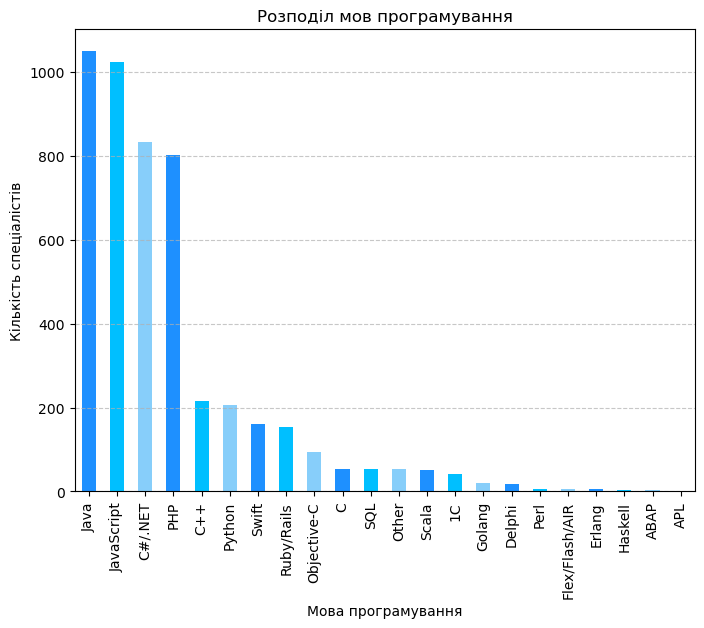

In [153]:
import matplotlib.pyplot as plt

# Побудова графіка розподілу мов програмування
plt.figure(figsize=(8, 6))

desired_table['Мова програмування'].iloc[1:].value_counts().plot(kind='bar', color=['dodgerblue', 'deepskyblue', 'lightskyblue'])
plt.title('Розподіл мов програмування')
plt.xlabel('Мова програмування')
plt.ylabel('Кількість спеціалістів')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

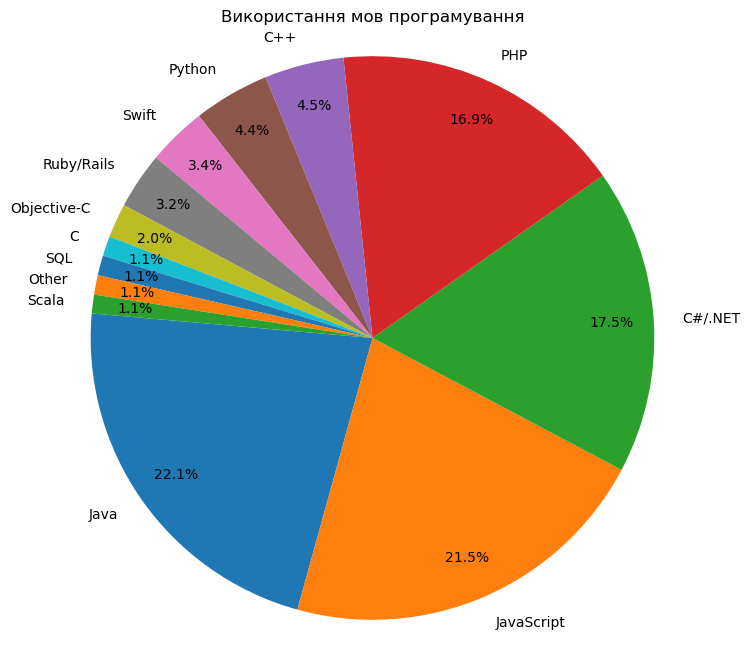

In [164]:
#language_counts = desired_table['Мова програмування'].value_counts()
#desired_table_filtered = desired_table.iloc[1:]
#language_counts = desired_table_filtered['Мова програмування'].value_counts()
# Побудова кругової діаграми
#plt.figure(figsize=(8, 8))
#plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
#plt.title('Використання мов програмування')
#plt.axis('equal')  # Забезпечує кругову форму діаграми
#plt.show()

language_counts = desired_table['Мова програмування'].value_counts()
total_count = language_counts.sum()

# Фільтрація мов програмування з відсотковим значенням більше 1%
filtered_language_counts = language_counts[language_counts / total_count * 100 > 1]

# Побудова кругової діаграми тільки для відфільтрованих мов програмування
plt.figure(figsize=(8, 8))
plt.pie(filtered_language_counts, labels=filtered_language_counts.index, autopct='%1.1f%%', startangle=175, pctdistance=0.85)
plt.title('Використання мов програмування')
plt.axis('equal')  # Забезпечує кругову форму діаграми
plt.show()

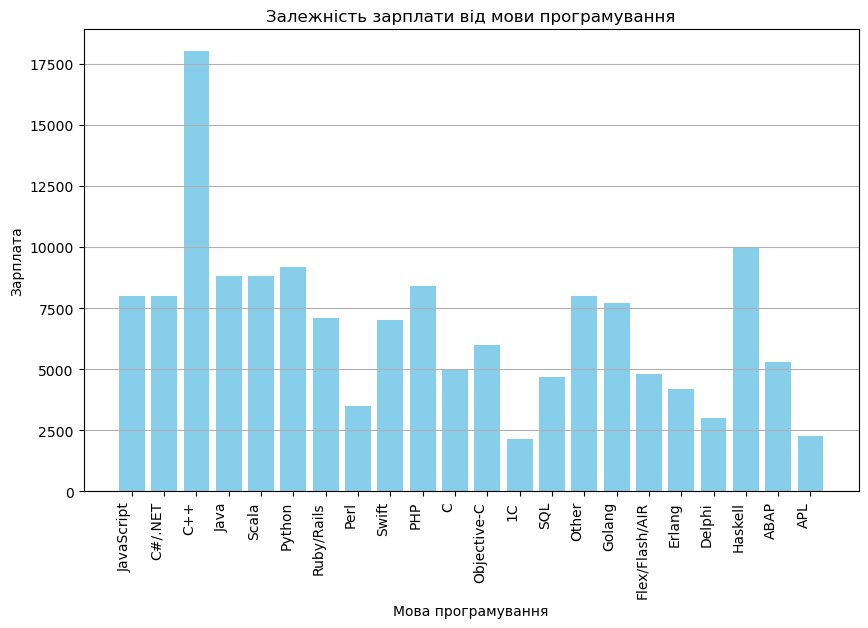

In [157]:
languages = data_clean['Мова програмування']
salaries = data_clean['Зарплата на місяць']

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.bar(languages.iloc[1:], salaries.iloc[1:], color='skyblue')
plt.title('Залежність зарплати від мови програмування')
plt.xlabel('Мова програмування')
plt.ylabel('Зарплата')
plt.xticks(rotation=90, ha='right')  # Поворот підписів по осі X
plt.grid(axis='y')  # Сітка лише по осі Y
plt.show()